In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model
import time
from sklearn.metrics import silhouette_samples, silhouette_score
import networkx as nx
import matplotlib.pyplot as plt
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
from sklearn import metrics
import sklearn

In [ ]:
c1 = np.zeros((10000,10000),dtype='float')
fichier_matrice_x = open("/content/drive/MyDrive/PCD/data/data1_matriceB.txt", "r")
k=0
for line in fichier_matrice_x:
  l=list(line.split(" "))
  for j in range(10000):
    c1[k][j]=float(l[j])
  k+=1

In [ ]:
c2 = np.zeros((10000,10000),dtype='float')
fichier_matrice_x1 = open("/content/drive/MyDrive/PCD/data/data1_matriceBB.txt", "r")
k=0  
for line in fichier_matrice_x1:
  l1=list(line.split(" "))
  for j in range(10000):
    c2[k][j]=float(l1[j]) 
  k+=1

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(c1)
data_scaled1 = scaler.fit_transform(c2)

In [ ]:
score_2 = []
range_values = range(1, 15)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(c1)
    score_2.append(kmeans.inertia_)

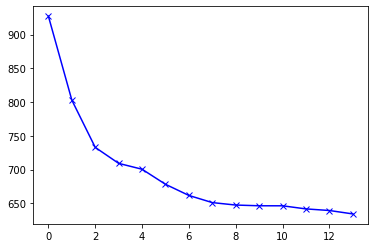

In [6]:
plt.plot(score_2, 'bx-')

In [7]:
score_3 = []
range_values = range(1, 15)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(c2)
    score_3.append(kmeans.inertia_)

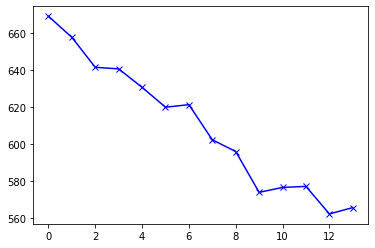

In [8]:
plt.plot(score_3, 'bx-')

In [9]:
#from modularity_maximization.utils import get_modularity
kmeans = KMeans(5)
kmeans.fit(c1)
labels_c1 = kmeans.labels_
#metrics
silhouette_avg = silhouette_score(c1, labels_c1)
Davies_M= sklearn.metrics.davies_bouldin_score(c1, labels_c1)
Calinski_Harabaz=metrics.calinski_harabasz_score(c1, labels_c1)  
print(Calinski_Harabaz)
print(Davies_M)
print(silhouette_avg)
#dict={}
#for i in range(80):
  #dict[i]=labels[i]
#print(dict)  
#print(get_modularity(g, dict))
#df_cluster_dr = pd.concat([dfrania, pd.DataFrame({'cluster': labels})], axis = 1)

773.3671160845423
0.7953859916659033
0.3053175465911993


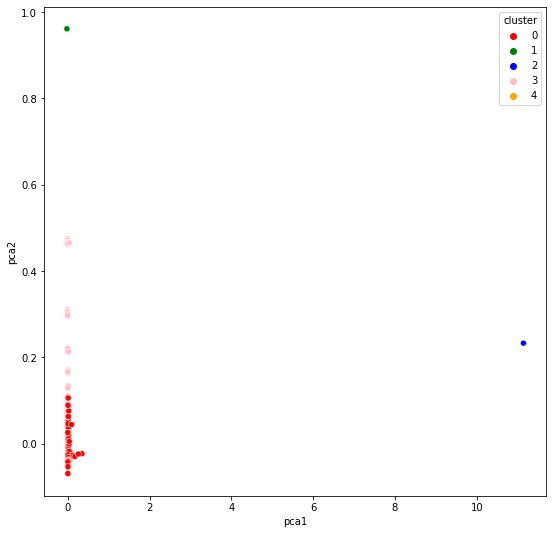

In [10]:
# graphe couche1
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(c1)
pca_df= pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels_c1})], axis = 1)
plt.figure(figsize = (9,9))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df, palette = ['red','green','blue','pink','orange'])
#palette = ['red','green','blue','pink','brown','yellow']

In [11]:
kmeans = KMeans(11)
kmeans.fit(c2)
labels_c2 = kmeans.labels_
#metrics
silhouette_avg = silhouette_score(c2, labels_c2)
Davies_M= sklearn.metrics.davies_bouldin_score(c2, labels_c2)
Calinski_Harabaz=metrics.calinski_harabasz_score(c2, labels_c2)  
print(Calinski_Harabaz)
print(Davies_M)
print(silhouette_avg)

139.63994909739938
0.6530657680595477
0.249250167948637


In [ ]:
# graphe couche2
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(c2)
pca_df= pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels_c2})], axis = 1)
plt.figure(figsize = (9,9))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df, palette = ['red','green','blue','pink','orange'])
#palette = ['red','green','blue','pink','brown','yellow']

In [13]:
#fusionner les deux couches
M = np.zeros((10000,10000),dtype='float')
k=0
for i in range(10000):
  for j in range(i+1,10000):
    if(labels_c1[i]==labels_c1[j]):
      k+=1
    if(labels_c2[i]==labels_c2[j]):
      k+=1  
    M[i][j]=k
    M[j][i]=k
    k=0

In [14]:
scaler = StandardScaler()
data_scaled2 = scaler.fit_transform(M)

In [ ]:
data_scaled2

In [18]:
score_4 = []
range_values = range(1, 15)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(M)
    score_4.append(kmeans.inertia_)

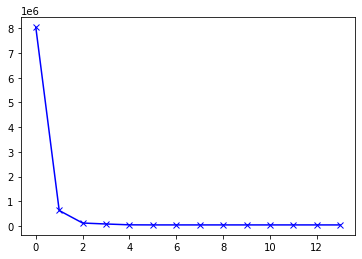

In [19]:
plt.plot(score_4, 'bx-')

In [21]:
kmeans = KMeans(2)
kmeans.fit(M)
labels = kmeans.labels_
#metrics
silhouette_avg = silhouette_score(data_scaled2, labels)
Davies_M= sklearn.metrics.davies_bouldin_score(data_scaled2, labels)
Calinski_Harabaz=metrics.calinski_harabasz_score(data_scaled2, labels)  

print(Calinski_Harabaz)
print(Davies_M)
print(silhouette_avg)
#df_cluster_dr2 = pd.concat([dfahmed_rania, pd.DataFrame({'cluster': labels})], axis = 1)

113332.60702644101
0.2699351867706433
0.9507120592560047


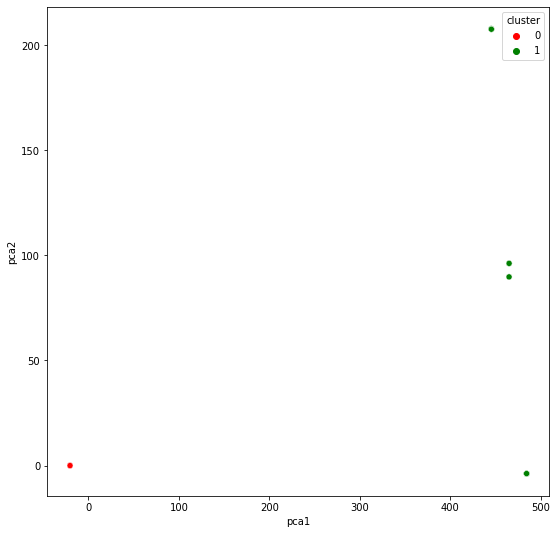

In [ ]:
principal_comp2 = pca.fit_transform(data_scaled2)
pca_df2 = pd.DataFrame(data = principal_comp2, columns = ['pca1', 'pca2'])
pca_df2 = pd.concat([pca_df2, pd.DataFrame({'cluster': labels})], axis = 1)
plt.figure(figsize = (9,9))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df2, palette = ['red','green'])